In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from re import search
from collections import Counter

In [2]:
df_nytimes = pd.read_csv("DATA/quotes_nytimes.csv.bz2", compression='bz2', encoding='UTF-8', index_col=0)
df_nytimes.reset_index(inplace=True, drop=True)
df_nytimes.head()

,quoteID,quotation,speaker,date,numOccurrences,urls_parse,topic,aliases,nationality,occupation,party
0,2015-12-14-042927,ignore and diminish their capacity to grow.,None,2015-12-14 08:31:05,1,nytimes.com,te,NaN,NaN,NaN,NaN
1,2015-10-02-055672,It's a missed opportunity to raise the price o...,David Keyes,2015-10-02 17:54:14,1,mobile.nytimes.com,blogs,NaN,NaN,NaN,NaN
2,2015-01-29-030054,I hated feeling constrained or constricted.,Leith Clark,2015-01-29 00:37:03,1,www.nytimes.com,unknown,NaN,NaN,['personal stylist'],NaN
3,2015-11-30-103188,the whole has to be included,Angela Merkel,2015-11-30 00:00:00,8,www.nytimes.com,projects,NaN,NaN,NaN,NaN
4,2015-07-31-104433,treated me like a boy.,Garnet Coleman,2015-07-31 03:05:09,3,mobile.nytimes.com,us,NaN,['United States of America'],['politician'],['Democratic Party']


### More represented topics

Text(0, 0.5, 'Counts')

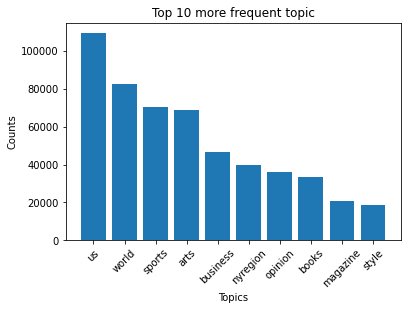

In [3]:
top_10_topic = df_nytimes.groupby('topic')['quotation'].count().sort_values(ascending=False).head(10)
plt.xticks(rotation=45)
plt.bar(top_10_topic.index, top_10_topic.values)
plt.title("Top 10 more frequent topic")
plt.xlabel("Topics")
plt.ylabel("Counts")

In [4]:
# We expand the occupation array in multiple rows
df_nytimes_exp = df_nytimes.dropna().apply(lambda x: literal_eval(x['occupation']) if not search('nan', x['occupation']) else None, axis=1)
df_nytimes = df_nytimes.dropna()
df_nytimes['occ'] = df_nytimes_exp
df_nytimes = df_nytimes.explode('occ')
df_nytimes.head()

,quoteID,quotation,speaker,date,numOccurrences,urls_parse,topic,aliases,nationality,occupation,party,occ
13,2015-10-29-015023,"But Marco, when you signed up for this, this w...",Jeb Bush,2015-10-29 00:00:00,2,www.nytimes.com,unknown,"['John Ellis Bush' 'Bush, Jeb' 'John Ellis ""Je...","['United States of America', 'Spain']","['banker', 'politician', 'real estate develope...",['Republican Party'],banker
13,2015-10-29-015023,"But Marco, when you signed up for this, this w...",Jeb Bush,2015-10-29 00:00:00,2,www.nytimes.com,unknown,"['John Ellis Bush' 'Bush, Jeb' 'John Ellis ""Je...","['United States of America', 'Spain']","['banker', 'politician', 'real estate develope...",['Republican Party'],politician
13,2015-10-29-015023,"But Marco, when you signed up for this, this w...",Jeb Bush,2015-10-29 00:00:00,2,www.nytimes.com,unknown,"['John Ellis Bush' 'Bush, Jeb' 'John Ellis ""Je...","['United States of America', 'Spain']","['banker', 'politician', 'real estate develope...",['Republican Party'],real estate developer
13,2015-10-29-015023,"But Marco, when you signed up for this, this w...",Jeb Bush,2015-10-29 00:00:00,2,www.nytimes.com,unknown,"['John Ellis Bush' 'Bush, Jeb' 'John Ellis ""Je...","['United States of America', 'Spain']","['banker', 'politician', 'real estate develope...",['Republican Party'],bookbinder
13,2015-10-29-015023,"But Marco, when you signed up for this, this w...",Jeb Bush,2015-10-29 00:00:00,2,www.nytimes.com,unknown,"['John Ellis Bush' 'Bush, Jeb' 'John Ellis ""Je...","['United States of America', 'Spain']","['banker', 'politician', 'real estate develope...",['Republican Party'],writer


### More frequent occupation for the speakers

Text(0, 0.5, 'Counts')

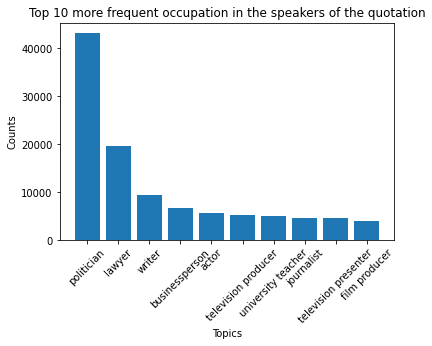

In [5]:
most_frequent_occ = df_nytimes.groupby('occ').count()['quotation'].sort_values(ascending=False).head(10)
plt.xticks(rotation=45)
plt.bar(most_frequent_occ.index, most_frequent_occ.values)
plt.title("Top 10 more frequent occupation in the speakers of the quotation")
plt.xlabel("Topics")
plt.ylabel("Counts")

### Now we analyse the more frequent occupations for the more frequent topics

In [7]:
# We group by topic and occupation to get the more frequent occupation by topic
grp_topic_occ = df_nytimes.groupby(['topic', 'occ']).count()['quotation'].sort_values(ascending=False)
grp_topic_occ.head(10)

topic     occ               
us        politician            18056
          lawyer                 9322
world     politician             9062
opinion   politician             4124
nyregion  politician             3202
us        writer                 3187
          university teacher     2937
          businessperson         2839
world     lawyer                 2513
nyregion  lawyer                 2266
Name: quotation, dtype: int64

Text(0, 0.5, 'Counts')

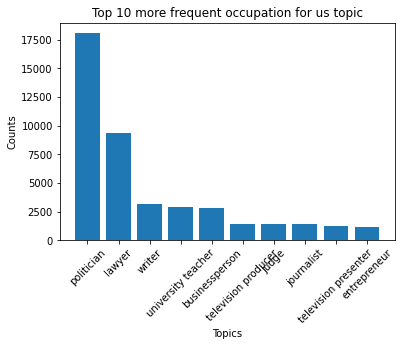

In [9]:
top_10_us_occupation = grp_topic_occ[grp_topic_occ.index.get_level_values(0) == 'us'].head(10)
plt.xticks(rotation=45)
plt.bar(top_10_us_occupation.index.get_level_values(1), top_10_us_occupation.values)
plt.title("Top 10 more frequent occupation for us topic")
plt.xlabel("Topics")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

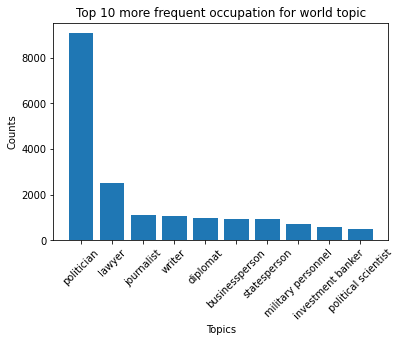

In [10]:
top_10_world_occupation = grp_topic_occ[grp_topic_occ.index.get_level_values(0) == 'world'].head(10)
plt.xticks(rotation=45)
plt.bar(top_10_world_occupation.index.get_level_values(1), top_10_world_occupation.values)
plt.title("Top 10 more frequent occupation for world topic")
plt.xlabel("Topics")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

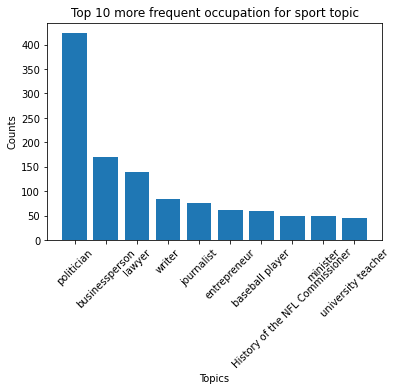

In [11]:
top_10_sport_occupation = grp_topic_occ[grp_topic_occ.index.get_level_values(0) == 'sports'].head(10)
plt.xticks(rotation=45)
plt.bar(top_10_sport_occupation.index.get_level_values(1), top_10_sport_occupation.values)
plt.title("Top 10 more frequent occupation for sport topic")
plt.xlabel("Topics")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

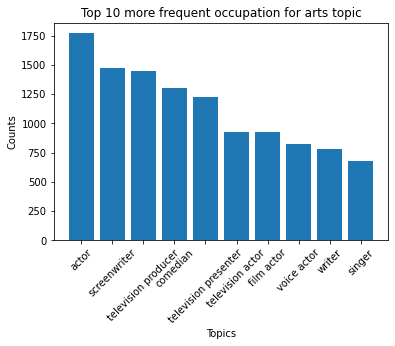

In [12]:
top_10_arts_occupation = grp_topic_occ[grp_topic_occ.index.get_level_values(0) == 'arts'].head(10)
plt.xticks(rotation=45)
plt.bar(top_10_arts_occupation.index.get_level_values(1), top_10_arts_occupation.values)
plt.title("Top 10 more frequent occupation for arts topic")
plt.xlabel("Topics")
plt.ylabel("Counts")

### Results analysis
We can remark that the "politician" occupation is over represented in a global scope and in the most frequent topics. But we also observe that the media are not biased to the most famous politicians eg. Trump. We can conclude that most quotes are related to politics and the government.